In [20]:
! pip install nltk

In [21]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [22]:
messages  = pd.read_csv(r"E:\PGA $$ 23 $$\Deep Learning\spam1.csv",encoding ='cp1252')
messages.shape
#Windows-1252 or CP-1252 is a single-byte character encoding of the Latin alphabet,
#used by default in the legacy components of Microsoft Windows for
#English and many European languages including Spanish, French, and German

(6776, 5)

In [23]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [24]:
messages.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [25]:
messages = messages.iloc[: ,[0,1]]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
messages.rename(columns={'v1':'labels',"v2":'message'},inplace = True)
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
messages.labels.replace({"ham":0,"spam":1},inplace = True)
messages.head()

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Lets convert whole Data in Lower Case

In [28]:
messages.message = messages.message.str.lower()  
messages.tail()

,labels,message
6771,1,this is the 2nd time we have tried 2 contact u...
6772,0,will ì_ b going to esplanade fr home?
6773,0,"pity, * was in mood for that. so...any other s..."
6774,0,the guy did some bitching but i acted like i'd...
6775,0,rofl. its true to its name


## Remove Stop words and Punctuation

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     SHINDE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [33]:
messages.message.apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

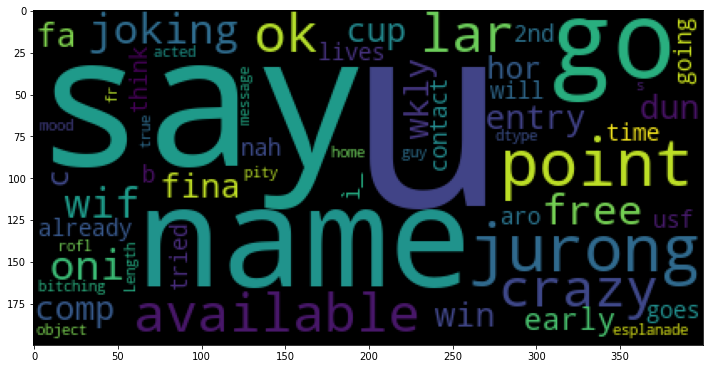

In [34]:
from wordcloud import WordCloud
WordCloud
cloud = WordCloud().generate(str(messages['message']))
fig = plt.figure(figsize=(12,12))
plt.imshow(cloud)

### Creating WordCloud on Span and Ham messages sepearetly

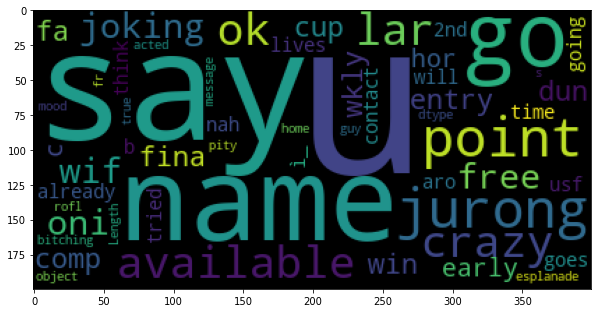

In [35]:
df_spam = messages[messages.labels=='spam']                  # SPAM Messages
df_spam.head()

wc = WordCloud(max_words=50)
wc_img = wc.generate(str(df_spam.message))
fig = plt.figure(figsize=(10,10))
plt.imshow(cloud)

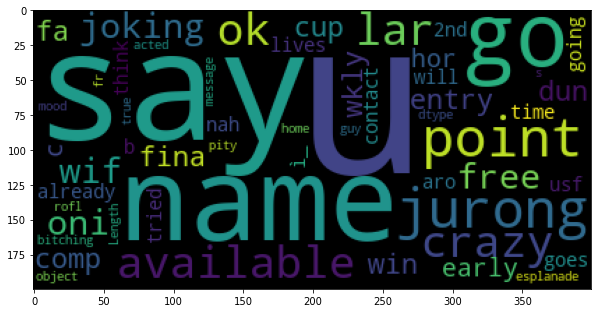

In [36]:
df_ham = messages[messages.labels=='ham']                  # HAM Messages
df_ham.head()

wc = WordCloud(max_words=50)
wc_img = wc.generate(str(df_ham.message))
fig = plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer  # get count of each and every word
bow_transformer =    CountVectorizer(analyzer = text_process   ).fit(messages["message"])


In [38]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [39]:
len(bow_transformer.vocabulary_) # total number of Unique words

9422

In [40]:
messages_bow = bow_transformer.transform(messages.message) # creating the TDM
# This TDM will act as my X variable

In [41]:
messages_bow.shape

(6776, 9422)

In [42]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(messages_bow , messages.labels , test_size = .2)

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [45]:
nb.fit(x_train , y_train)

MultinomialNB()

In [46]:
pred= nb.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix
tab_nb = confusion_matrix(pred,y_test)
tab_nb

array([[1167,    9],
       [  23,  157]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,y_test)
acc

0.976401179941003

In [49]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [50]:
pred_dt= dt.predict(x_test)
from sklearn.metrics import confusion_matrix
tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[1181,   23],
       [   9,  143]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(pred_dt,y_test)
acc_dt

0.976401179941003

In [52]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [53]:
pred_rf= rf.predict(x_test)
from sklearn.metrics import confusion_matrix
tab_rf = confusion_matrix(pred_rf,y_test)
tab_rf

array([[1190,   28],
       [   0,  138]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(pred_rf,y_test)
acc_rf

0.9793510324483776